# Inverted Pendulum Cart

The system in this example consists of an inverted pendulum mounted to a motorized cart. The inverted pendulum system is an example commonly found in control system textbooks and research literature. Its popularity derives in part from the fact that it is unstable without control, that is, the pendulum will simply fall over if the cart isn’t moved to balance it. Additionally, the dynamics of the system are nonlinear. The objective of the control system is to balance the inverted pendulum by applying a force to the cart that the pendulum is attached to. A real-world example that relates directly to this inverted pendulum system is the attitude control of a booster rocket at takeoff.

## Modeling

In this case we will consider a two-dimensional problem where the pendulum is constrained to move in the vertical plane shown in the figure below. For this system, the control input is the force F that moves the cart horizontally and the outputs are the angular position of the pendulum and the horizontal position of the cart $x$.

<div align="center">
	<img src="https://pub-f074cead5eaf408790b463b05f6e8b32.r2.dev/cart-pendulum.png" alt="Cart Pendulum"/>
</div>

We'll define a set of variables already established within the problem. Frequently, we encounter situations where the system's data isn't readily accessible, requiring us to either measure it or, on occasion, make estimations.

- $M$: mass of the cart $[kg]$
- $m$: mass of the pendulum $[kg]$
- $I$: moment of inertia of the pendulum $[\frac{kg}{m^2}]$
- $F$: force applied to the cart $[N]$
- $\theta$: pendulum angle to the cart $[rad]$
- $x$: cart position $[m]$

## System Requirements

Additionally, we'll establish several constraints for the design. Following the modeling phase, we need to design our controller to meet the specified criteria.

1. The setting time for $\theta$ and $x$ should be less than 5 seconds.
2. $\theta$ must not deviate further than 0.05 rad.
3. The rise time for $x$ should be less than 0.5 seconds.
4. Steady-state error should be at most 2% for $x$ and $theta$.

## System Kinematics

Once we've defined the system qualitatively—using its free-body diagram—we need to translate this into equations. To begin, we should start from Newton's second law, right?

$$
\sum^N_{i=0} F_i = m \cdot a
$$

Given that this problem is 1-dimensional, the axis along which the cart translates will be denoted as ``x``, as defined previously. It's important to note that although we have a force directed downwards due to the mass of the cart, it's balanced by the normal force directed upwards by the floor—although not explicitly shown in the free-body mass diagram—thus, the kinematics in the y-axis isn't considered.

$$
F = M a + b v + N
$$

> We're updating the variable names with a different notation commonly employed in control theory, specifically in state-space modeling.

As previously defined, $x$ represents the position of the cart, and according to physics, we understand that $v = \frac{dx}{dt}$ and $a = \frac{d^2x}{dt^2}$.

For the sake of notation simplicity, we'll denote derivatives with respect to $t$ using a dot above the variable, such as $\dot{x}$ for the derivative of position with respect to time, representing velocity. Furthermore, we'll omit the vector notation for physical quantities.

Therefore, the equation can be rewritten as:

$$
F = M \ddot{x} + b \dot{x} + N
$$

Secondly, we could talk a little bit about the pendulum. The pendulum is a rigid body whose mass is $m$. The coordinates of the center of mass is defined by the tuple 
$(x_p, y_p)$, although, the coordinate $y_p$ is of no interest as the problem happens in the one axis. Then, we could define the position of the center of mass as a function of the cart position $x$.

Secondly, let's delve into the pendulum. It's a rigid body with a mass denoted by $m $. The coordinates of its center of mass are described by the tuple $(x_p, y_p)$, yet $y_p$ holds no relevance since the issue pertains solely to a single axis. Consequently, we can establish the position of the center of mass as a function of the cart position $x$.

$$
x_p = x + l \sin(\theta)
$$

If we differentiate this function with respect to time, we obtain the acceleration of the pendulum's center of mass, expressed as:

$$
\ddot{x}_p = \ddot{x} - l \sin(\theta)\dot{\theta}^2 + l \cos(\theta)\ddot{\theta}
$$

We can also establish the pendulum's kinematics based on Newton's second law of motion.

$$
N = m \ddot{x}_p
$$

Replacing $\ddot{x}_p$, we obtain the following equation.

$$
N = m \ddot{x} - ml\sin(\theta)\dot{\theta}^2 + ml\cos(\theta)\ddot{\theta}
$$

Now, if we combine the kinematics of the pendulum with those of the cart, we arrive at a single nonlinear equation involving both the angle of the pendulum and the position of the cart.

$$
(M + m)\ddot{x} + b\dot{x} + ml\cos(\theta)\ddot{\theta} - ml\sin(\theta)\dot{\theta}^2 = F
$$

We know $\ddot{y}_p = l \cos(\theta)$. Hence,

$$
P = mg - ml\cos(\theta)\dot{\theta}^2 - ml\sin(\theta)\ddot{\theta}
$$

Finally, we should employ the sum of moments equation to eliminate $P$ and $N$.

$$
(I + ml^2)\ddot{\theta} = mgl\sin(\theta) - ml\cos(\theta)\ddot{x}
$$

### Equations of Motion

After the previous steps, we came up with two equations of motion.

$$
\begin{cases}
	(M + m)\ddot{x} + b \dot{x} + ml\cos(\theta)\ddot{\theta} - ml \sin(\theta)\dot{\theta}^2 = F \\
	(I + ml^2)\ddot{\theta} = mgl \sin(\theta) - ml \cos(\theta)\ddot{x}
\end{cases}
$$

As you can see, it's a nonlinear system, and in this example we'll work with techniques applied for linear systems. Therefore, we must linearize the system around a given point.

We assume that $\theta = \pi + \phi$ where $\phi$ is the deviation which should be pretty small according to our requirements, and also that $\theta = \pi$ where this is upward vertical equilibrium point. Thus, we can use the small angles approximation below.

$$
\begin{cases}
	\cos(\theta) = \cos(\pi + \phi) \approx 1 \\
	\sin(\theta) = \sin(\pi + \phi) \approx -\phi \\
	\dot{\theta}^2 = \dot{\phi}^2 \approx 0
\end{cases}
$$

Then, the linealized system is the following

$$
\begin{cases}
	(M + m)\ddot{x} + b \dot{x} - ml\ddot{\phi} = F \\
	(I + ml^2)\ddot{\phi} - mgl = ml\ddot{x}
\end{cases}
$$

## State-space Equations

Two second-order differential equations have emerged, which can be tackled using various techniques. However, the most commonly employed method is the state-space equations of the system, offering numerous advantages over other approaches. For instance, one can represent the two second-order differential equations as four first-order differential equations—two for each original equation.

To fit the the state-space representation, we need to rename the variables. Our new variables are $\bar{x} = (x_1,x_2,x_3,x_4)$. Hence,

$$
\begin{cases}
	x_1 = x \\
	x_2 = \dot{x} \\
	x_3 = \phi \\
	x_4 = \dot{\phi}
\end{cases}
$$

$$
\begin{cases}
	\dot{x_1} = \dot{x} = x_2 \\
	\dot{x_2} = \ddot{x} \\
	\dot{x_3} = \dot{\phi} = x_4 \\
	\dot{x_4} = \ddot{\phi}
\end{cases}
$$

Also, $F = u$, then the linearized system holds

$$
\begin{cases}
	\dot{x_1} = \dot{x_2} \\
	(M + m)\dot{x_2} + bx_2 - ml\dot{x_4} = u \\
	\dot{x_3} = x_4 \\
	(I + ml^2)\dot{x_4} - mglx_3 = ml\dot{x_2}
\end{cases}
$$

By manipulating the second and fourt equation, we can decouple the angle and the position. Ultimately, the state-space representation is defined below.

$$
\begin{bmatrix}
	\dot{x_1} \\
	\dot{x_2} \\
	\dot{x_3} \\
	\dot{x_4}
\end{bmatrix} =
\begin{bmatrix}
	0 & 1 & 0 & 0 \\
	0 & \frac{-(I + ml^2)b}{I(M + m) + Mml^2} & \frac{m^2gl^2}{I(M + m) + Mml^2} & 0 \\
	0 & 0 & 0 & 1 \\
	0 & \frac{-mlb}{I(M + m) + Mml^2} & \frac{mgl(M + m)}{I(M + m) Mml^2} & 0
\end{bmatrix}
\begin{bmatrix}
	x_1 \\
	x_2 \\
	x_3 \\
	x_4
\end{bmatrix} + 
\begin{bmatrix}
	0 \\
	\frac{I + ml^2}{I(M + m) + Mml^2} \\
	0 \\
	\frac{ml}{I(M + m) + Mml^2}
\end{bmatrix}
$$

$$
\begin{bmatrix}
	y_1 \\
	y_2
\end{bmatrix} =
\begin{bmatrix}
	1 & 0 & 0 & 0 \\
	0 & 0 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
	x_1 \\
	x_2 \\
	x_3 \\
	x_4
\end{bmatrix}
$$

## Controller Design

Modelling is quite fun to do, but what good is it if the system that we're designing is unstable? To check that out we need to define values for the variables declared at the beginning. It will allow us to check the poles and zeros of the open and closed-loop system.z

In [7]:
M = 0.5;
m = 0.2;
b = 0.2;
I = 0.006;
g = 9.8;
l = 0.3;

Given the data for the variables, we can compute the state matrix $A$, the input matrix $B$, and the output matrix $C$.

In [8]:
d = I*(M+m) + M*m*l^2;

A= [
    0 1 0 0;
    0 -(I+m*l^2)*b/d m^2*g*l^2/d 0;
    0 0 0 1;
    0 -m*l*b/d m*g*l*(M+m)/d 0
];

B = [0; (I+m*l^2)/d; 0; m*l/d];

C = [1 0 0 0; 0 0 1 0];
D = [0; 0];

In [13]:
using ControlSystems;
using LinearAlgebra: eigen, rank;
using Plots;
using LaTeXStrings;

In [14]:
sys = ss(A, B, C, D)

StateSpace{Continuous, Float64}
A = 
 0.0   1.0                   0.0                 0.0
 0.0  -0.36363636363636365   2.6727272727272737  0.0
 0.0   0.0                   0.0                 1.0
 0.0  -0.9090909090909091   31.181818181818183   0.0
B = 
 0.0
 1.8181818181818181
 0.0
 4.545454545454545
C = 
 1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0
D = 
 0.0
 0.0

Continuous-time state-space model

### Open-loop System

Now, we'd like to assess if the open-loop system is stable. One approach to achieve this is by plotting the poles and zeros.

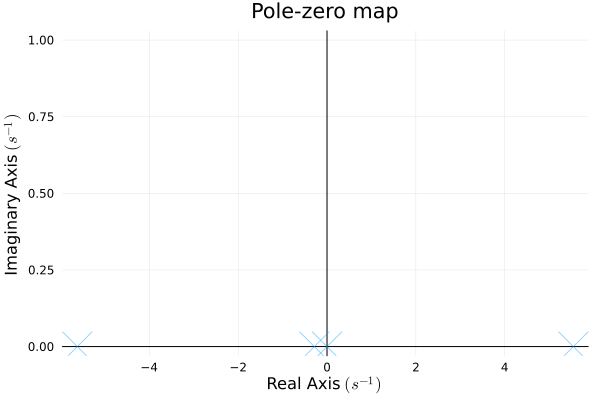

In [15]:
pzmap(sys, ylabel="Imaginary Axis " * L"(s^{-1})", xlabel="Real Axis " * L"(s^{-1})")

The presence of a pole in the right-half plane indicates system instability. Each pole is denoted by a blue cross on the plot. Another method to assess system stability is by calculating the eigenvalues of the transition matrix $A$, i.e., solving the characteristic equation $A - \lambda I = 0$. For this purpose, in `LinearAlgebra.jl`, there exists a function called `eigen` that computes the eigenvectors of a matrix and the associated eigenvalues.

In [16]:
eigen(A)

LinearAlgebra.Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
4-element Vector{Float64}:
 -5.625264905681243
 -0.28551004669972957
  0.0
  5.547138588744611
vectors:
4×4 Matrix{Float64}:
  0.0157409  -0.961542    1.0  0.0144142
 -0.0885466   0.27453     0.0  0.0799573
  0.174316    0.00802477  0.0  0.176827
 -0.980574   -0.00229115  0.0  0.980883

Once more, the system exhibits instability, evidenced by the presence of a positive eigenvalue, and all its eigenvalues being real.

## Controllability

Before delving into designing the controller itself, it's prudent to perform some preliminary checks. 
The primary question to consider is: can we steer the system to a specific state by applying a specific input?
Formally, controllability for a Linear Time-Invariant (LTI) system can be defined as follows: an LTI system is controllable if, for every $x_1$, and every $T > 0$, there exists an input function $u(t)$, $0 < t \leq T$, such that the system transitions from $0$ at $t = 0$ to $x_1$ at $t = T$.

### Controllability Proof

To establish the controllability of the system, it's necessary to compute the controllability matrix and subsequently analyze the rank of the output matrix. This process can be achieved using the `ctrb` function available in the `ControlSystems.jl` package.

rank(ctrb(A, B))

As observed, the rank of the controllability matrix is 4. Consequently, there are no uncontrollable states. With this result, let's continue constructing our controller.

## Linear Quadratic Regulator (LQR)

To control the plant we will do full-state feedback, i.e., every state variable is going to be measured, and used to control both the position of the cart and the angle of the pendulum.

LQR is a technique used in optimal control with the goal to optimize performance and effort. The system to control has to be linear, and the cost function—known as objective function in optimization terms—must be quadratic.

The goal of this algorithm is to find the $K$ gain to control the system by minimizing the specified cost function.

The cost function, for the infinite horizon LQR, has the form of:

$$
J = \int^\infty_0 \left[x(t)^\top Q x(t) + u(t)^\top R u(t) + 2x(t)^\top N u(t)\right]dt
$$

$Q$ is the state cost, $R$ is the input cost, and $N$ is the cross-term cost; this last term is generally ignored. The state cost will penalize or reward certain states as well as the input cost will do the same for certain inputs. These matrices are generally parameters that we have to tune in order to meet the design criteria.

Therefore, given the system $\dot{x} = Ax + Bu$, the input that maximizes the cost function is $u = -Kx$, where $K = R^{-1}(B^\top P(t) + N^\top)$, and $P$ is found by solving the [Riccati Differential Equation](https://en.wikipedia.org/wiki/Riccati_differential_equation).

Julia solves this problem with the function `lqr` from the `ControlSystems.jl` package.

In [46]:
Q = [
    5000 0 0 0;
    0 0 0 0;
    0 0 100 0;
    0 0 0 0;
];

R = 1;

K = lqr(A, B, Q, R);

Ac = A - B*K;
Bc = B;
Cc = C;
Dc = D;

sys = ss(Ac, Bc, Cc, Dc);

t = 0:0.01:5;
r = 0.2 * ones(1, size(t)[1]);

y, t, _, _ = lsim(sys, r, t);

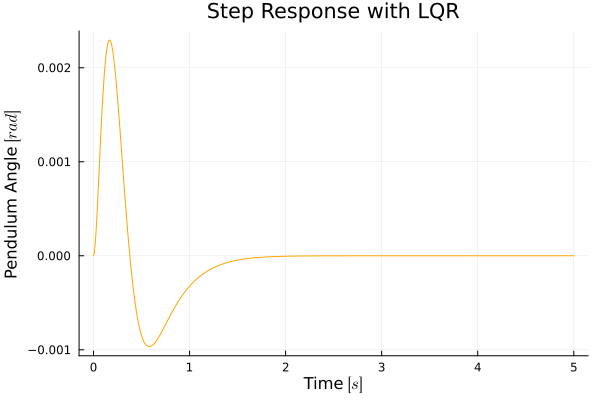

In [47]:
plot(t, y[2, :], 
	title="Step Response with LQR",
	xlabel="Time " * L"[s]", 
	ylabel="Pendulum Angle " * L"[rad]", 
	color = :orange,
	legend = false)

The angle stabilizes relatively quickly, reaching stability in approximately 2 seconds. However, an issue arises with the cart position, as it deviates from the reference signal of 0.2 meters and ends up very close to 0. How can we address this drift?

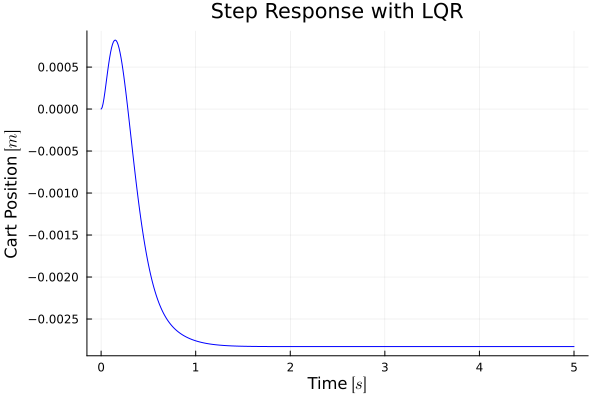

In [48]:
plot(t, y[1, :],
    title="Step Response with LQR",
    xlabel="Time " * L"[s]", 
    ylabel="Cart Position " * L"[m]", 
    color = :blue,
    legend = false)

There are two basic techniques to overcome this problem:

1. Precompensation.
2. Integrator.

### Precompensation

To incorporate a precompensator block, the closed-loop system needs to be redefined by modifying the $B$ matrix. The following code demonstrates how to seamlessly integrate this component.

In [24]:
Nbar = -71;

sys = ss(Ac, Bc*Nbar, Cc, Dc);

y, _, _, _ = lsim(sys, r, t);

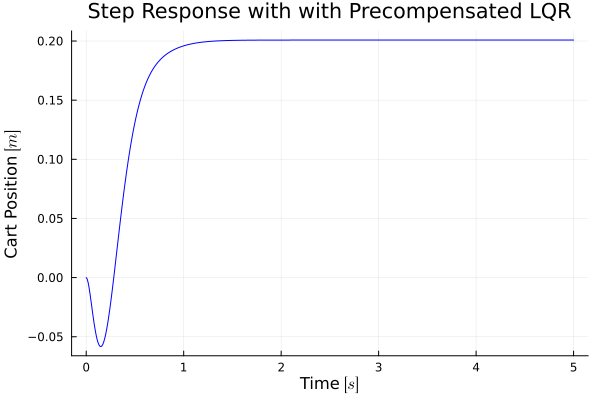

In [26]:
plot(t, y[1, :],
	title="Step Response with with Precompensated LQR",
	xlabel="Time " * L"[s]", 
	ylabel="Cart Position " * L"[m]", 
	color = :blue,
	legend = false)

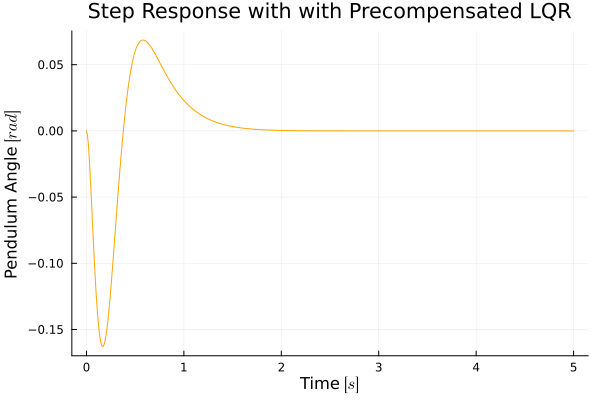

In [27]:
plot(t, y[2, :],
	title="Step Response with with Precompensated LQR",
	xlabel="Time " * L"[s]", 
	ylabel="Pendulum Angle " * L"[rad]", 
	color = :orange,
	legend = false)

### Integral Action

This presents the alternative option. To implement it, we need to augment the state-space model of the open-loop system.

$$
\begin{bmatrix}
	\dot{x_1} \\
	\dot{x_2} \\
	\dot{x_3} \\
	\dot{x_4} \\
	\dot{q_1}
\end{bmatrix} =
\begin{bmatrix}
	0 & 1 & 0 & 0 & 0 \\
	0 & \frac{-(I + ml^2)b}{I(M + m) + Mml^2} & \frac{m^2gl^2}{I(M + m) + Mml^2} & 0 & 0 \\
	0 & 0 & 0 & 1 & 0 \\
	0 & \frac{-mlb}{I(M + m) + Mml^2} & \frac{mgl(M + m)}{I(M + m) Mml^2} & 0 & 0 \\
	-1 & 0 & 0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
	x_1 \\
	x_2 \\
	x_3 \\
	x_4 \\
	q_1
\end{bmatrix} + 
\begin{bmatrix}
	0 \\
	\frac{I + ml^2}{I(M + m) + Mml^2} \\
	0 \\
	\frac{ml}{I(M + m) + Mml^2} \\
	0
\end{bmatrix}u + 
\begin{bmatrix}
	0 \\
	0 \\
	0 \\
	0 \\
	1
\end{bmatrix} r
$$

$$
\begin{bmatrix}
	y_1 \\
	y_2
\end{bmatrix} =
\begin{bmatrix}
	1 & 0 & 0 & 0 & 0 \\
	0 & 0 & 1 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
	x_1 \\
	x_2 \\
	x_3 \\
	x_4 \\
	q_1
\end{bmatrix}
$$

In [30]:
Aa = [A [0; 0; 0; 0]; [-C[1,:]' 0]];
Ba = [B; 0];

Qa = [
    1 0 0 0 0;
    0 1 0 0 0;
    0 0 50 0 0;
    0 0 0 1 0;
    0 0 0 0 5000
];

Ra = 1;

Ka = lqr(Aa, Ba, Qa, Ra);

Kc = Ka[1:4];
Ki = Ka[5];

Aca = [A - B*Kc' -B*Ki; -C[1,:]' 0];

Br = [zeros(4); 1];
Cca = [C zeros(2)];

sys = ss(Aca, Br, Cca, D);

y, _, _, _ = lsim(sys, r, t);

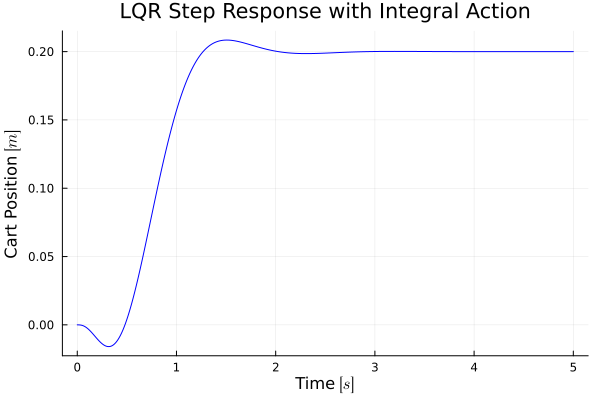

In [31]:
plot(t, y[1, :],
	title="LQR Step Response with Integral Action",
	xlabel="Time " * L"[s]", 
	ylabel="Cart Position " * L"[m]", 
	color = :blue,
	legend = false)

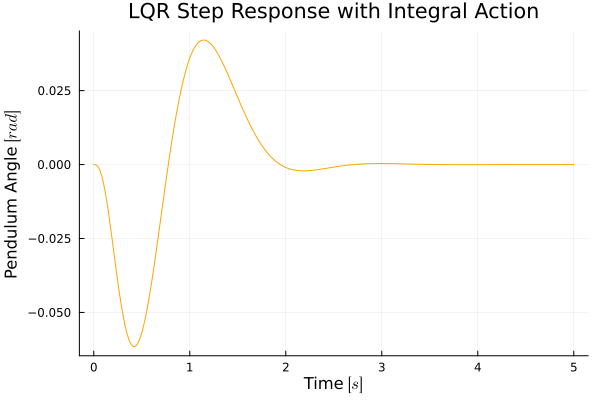

In [32]:
plot(t, y[2, :],
	title="LQR Step Response with Integral Action",
	xlabel="Time " * L"[s]", 
	ylabel="Pendulum Angle " * L"[rad]", 
	color = :orange,
	legend = false)

We've just observed that the controller performs quite well. The reference is tracked effectively for both the cart position and the pendulum angle. The integral action proves to be robust against disturbances in the model, making it an appealing technique due to its simplicity of implementation.

However, the controller falls short of meeting our initial requirements due to trade-offs that need addressing, such as the rise time and both overshoot and undershoot. Fine-tuning the LQR problem can be challenging, requiring adjustments to the values until the desired requirements are achieved.

Feel free to experiment with it and observe how the step response evolves.

## Observability

More often than not, our state vector cannot be entirely measured; sometimes, it cannot be measured at all. Therefore, designing a full-state feedback controller would be infeasible. Fortunately, we can employ this technique by estimating the state vector.

Various state observers exist, such as the Luenberger Observer and the Kalman Filter. While the latter is the optimal state observer and a component of the Linear Quadratic Gaussian (LQG) controller design, it won't be included in this script.

Instead, we'll implement the Luenberger observer. Before proceeding with the implementation, we should assess the observability of the system, similar to how we checked for controllability.

Observability can be easily verified by computing the rank of the observability matrix using the `obsv` function from the `ControlSystems.jl` package.

In [33]:
O = obsv(A, C)

8×4 Matrix{Float64}:
 1.0   0.0        0.0        0.0
 0.0   0.0        1.0        0.0
 0.0   1.0        0.0        0.0
 0.0   0.0        0.0        1.0
 0.0  -0.363636   2.67273    0.0
 0.0  -0.909091  31.1818     0.0
 0.0   0.132231  -0.971901   2.67273
 0.0   0.330579  -2.42975   31.1818

In [34]:
rank(O)

4

Great news! The system is observable, allowing us to proceed with state estimation. The following equation describes the dynamics of the estimated state based on ``u ``and ``y``, representing input and output respectively.

$$
\hat{x} = Ax + Bu + L(y - \hat{y})
$$

Where $L$ is the Luenberger gain that controls the error between the real system output and the estimated output.

We need to define the error between $x$ and $\hat{x}$, given by $e = x - \hat{x}$. Using this error with the first equatios, it's straightforward to derive the following differential equation.

$$
\dot{e} = (A - LC)e
$$

This is incredibly useful because it implies that we can easily modify the eigenvalues of the matrix $(A−LC)$ by simply defining the observer gain. In other words, if the $(A,C)$ pair is observable, we can adjust the observer gain accordingly. By doing so, we can place the eigenvalues in the left-half plane, rendering the system stable, and ultimately driving the error towards zero.

It's desired and often a good practice that the observer convergence is much faster than the convergence of the controller. The convergence speed is determined by the absolute value of the poles; therefore, the poles of the observer must be 4 to 10 times faster than the slowest pole of the closed-loop system. This guideline serves as a useful rule of thumb.

Now let's check the poles of the closed-loop system

In [35]:
eigen(Ac)

LinearAlgebra.Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
4-element Vector{ComplexF64}:
 -8.492507504942628 - 7.926757589064929im
 -8.492507504942628 + 7.926757589064929im
 -4.759120543008427 - 0.8309586658130484im
 -4.759120543008427 + 0.8309586658130484im
vectors:
4×4 Matrix{ComplexF64}:
 0.0269151-0.0172354im  0.0269151+0.0172354im  …  -0.0058915+0.0279565im
 -0.365198-0.0669779im  -0.365198+0.0669779im     0.00480764-0.137944im
 0.0581799-0.0543041im  0.0581799+0.0543041im       -0.19768-0.0345157im
 -0.924548-0.0im        -0.924548+0.0im             0.969465+0.0im

We observe from the output of the values that the slowest pole is 47591 + 0.831im. Therefore, the slowest observer pole will be set to -40.

It's worth noting the similarity in structure between $A−BK$ and $A−LC$, where in both cases, we need to compute the gain for our system; the former for control and the latter for the observer.

The `ControlSystems.jl` package provides a useful function called place, named after the technique known as pole placement. This function calculates the $L$ gain based on the desired poles and both matrices $A$ and $C$.

In [36]:
poles = [-40, -41, -42, -43];
L = place(A', C', poles)';

4×2 adjoint(::Matrix{Float64}) with eltype Float64:
   81.6263     -1.10093
 1651.74      -43.3093
   -3.34104    84.0101
 -174.495    1796.46

> If you happen to try this in MATLAB, please note that implementations of place may vary, and as a result, the values of the ``L`` gain may differ slightly between implementations.

### Observer-based System

Now it's time to define the augmented system based on the integral action augmented system—yes, we've augmented the open-loop system twice.

$$
\begin{bmatrix}
	\dot{x} \\
	\dot{q} \\
	\dot{e}
\end{bmatrix} =
\begin{bmatrix}
	A & 0 \\
	-C & 0 \\
	0 & A - LC
\end{bmatrix}
\begin{bmatrix}
	x \\
	q \\
	e
\end{bmatrix} +
\begin{bmatrix}
	B \\
	0
\end{bmatrix} u +
\begin{bmatrix}
	0 \\
	1 \\
	0
\end{bmatrix} r
$$

$$
y = 
\begin{bmatrix}
	C & 0
\end{bmatrix}
\begin{bmatrix}
	x \\
	q \\
	e
\end{bmatrix}
$$

In [38]:
Af = [
    A zeros(size(A)) zeros(4, 1);
    -C[1,:]' zeros(1, 5);
    zeros(size(A)) zeros(4, 1) A - L*C
];

Bf = [B; zeros(5, 1)];
Cf = [C zeros(size(C)) zeros(2, 1)];
Df = D;
Bfr = [zeros(4); 1; zeros(4)];

Qf = [
    200 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0;
    0 0 0 0 10000 0 0 0 0;
    0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0;
];

Rf = 0.001;

Kf = lqr(Af, Bf, Qf, Rf);

Now that we designed our LQR controller, we can close the loop.

In [40]:
sys = ss(Af - Bf*Kf, Bfr, Cf, Df);
y, _, _, _ = lsim(sys, r, t);

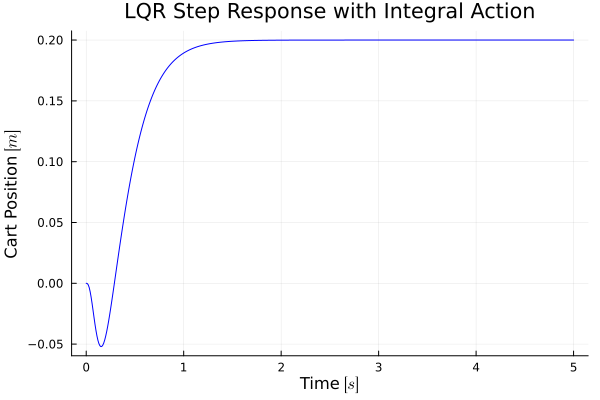

In [41]:
plot(t, y[1, :],
	title="LQR Step Response with Integral Action",
	xlabel="Time " * L"[s]", 
	ylabel="Cart Position " * L"[m]", 
	color = :blue,
	legend = false)

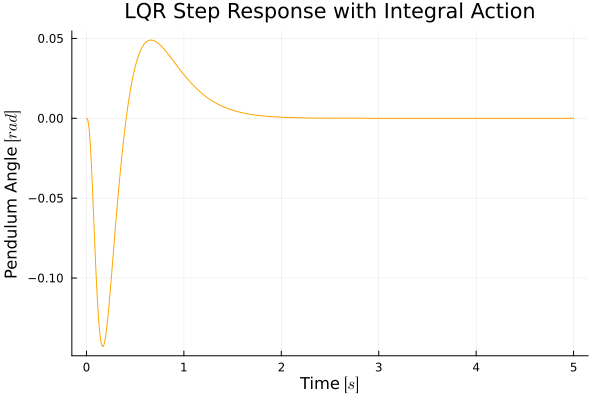

In [42]:
plot(t, y[2, :],
	title="LQR Step Response with Integral Action",
	xlabel="Time " * L"[s]", 
	ylabel="Pendulum Angle " * L"[rad]", 
	color = :orange,
	legend = false)

Success! LQR controller with a state estimator was carefully crafted and the controller works quite well.

## Conclusion

The state-space equations are a powerful and elegant mathematical tool that enables us to model systems in a meticulous manner, allowing for precise simulation of physical systems.

We began with a simple state feedback LQR controller, assuming the entire state vector was observable, making it straightforward to implement. In contrast, a PID controller requires time to tune until meeting our requirements. However, a state feedback controller necessitates a robust mathematical model of the system to compute the gain used to close the loop.

Nevertheless, this wasn't sufficient, as there was a noticeable drift between the output and the reference signal, resulting in poor tracking. Thus, we incorporated integral action into the model, enabling us to perfectly track our reference signal and even withstand additive disturbances.

Lastly, we concluded by estimating the state vector and utilizing that estimation to close the loop. We opted for the Luenberger observer, implemented via pole placement, which can be challenging to successfully implement in practice. Other algorithms, such as the LQG controller, circumvent this issue.

## References

- [Lecture 2 — LQR Controler. Control and Dynamical Systems, CALIFORNIA INSTITUTE OF TECHNOLOGY](https://www.cds.caltech.edu/~murray/courses/cds110/wi06/lqr.pdf)
- [Chapter 8 — Linear Quadratic Regulators. Underactuated Robotics, MASSACHUSETTS INSTITUTE OF TECHNOLOGY](https://underactuated.mit.edu/lqr.html)